In [1]:
# If in colab, clone the repo and install the dependencies
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/alignment-research-center/low-probability-estimation.git
    import sys
    sys.path.insert(0,'low-probability-estimation')

    #install all packages in the install_requires of lpe
    !pip install fancy-einsum
    !pip install jaxtyping
    !pip install datasets
    !pip install blobfile

    import os
    os.environ["BLOBFILE_FORCE_GOOGLE_ANONYMOUS_AUTH"] = "1"
    
import torch as th
import sys
import os
import matplotlib.pyplot as plt
from lpe.methods import QLD, GLD, ITGIS, MHIS, gaussian_sampling_estimator
from lpe.method_utils import *
from lpe.utils import Transformer
from lpe.utils import datasets as lpe_datasets

model_name = "gelu-1l"
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model = Transformer.from_pretrained(model_name).to(device)

dist_name = "camel"
gt_freqs = load_ground_truth(model_name, [dist_name], device=device)[dist_name] # ground truth tensor
gt_probs = gt_freqs / gt_freqs.sum()
targets = pick_random_tokens(gt_freqs, 16, 1e-9, 1e-5)

## Uncomment this line to cache the dataset used to generate the distribution (recommended). It
##   will save the dataset in your default HuggingFace cache directory and speed up the next cell.
# lpe_datasets.USE_CACHE = True

# Generate 2^16 samples of the pre-unembed activations (used for QLD and GLD)
acts = gen_activ_samples(model, dist_name, n_samples=2**16, show_progress=True)

# Generate estimates
methods = ["QLD", "ITGIS", "MHIS", "gaussian_sampling_estimator"]
estimates = {}
orig_dists = distribution_registry[dist_name](model.tokenizer, device=model.device).input_dists(n_reps=N_REPS_DICT[dist_name])
for method in methods:
    print(f"Computing estimates for {method}")
    estimates[method] = {}
    for target in tqdm(list(targets)):
        if method == "QLD":
            estimates[method][target] = QLD(model.unembed.W_U, acts, target)
        elif method == "gaussian_sampling_estimator":
            estimates[method][target] = gaussian_sampling_estimator(model, acts, target)
        elif method == "ITGIS":
            estimates[method][target] = ITGIS(model, orig_dists, target, temp=RECOMMENDED_TEMPS[model_name]["ITGIS"][dist_name], n_samples=2**16)
        elif method == "MHIS":
            estimates[method][target] = MHIS(model, orig_dists, target, temp=RECOMMENDED_TEMPS[model_name]["MHIS"][dist_name], n_samples=2**16, burn_in=2**10)

# Plot the (unfit) estimates
plt.figure(figsize=(12, 6))
colors = {'QLD': 'orange', 'ITGIS': 'red', 'MHIS': 'purple', 'gaussian_sampling_estimator': 'green'}
for method in methods:
    estimates_for_method = [estimates[method][target] for target in targets]
    plt.scatter(gt_probs[targets].cpu().numpy(), estimates_for_method, label=method, color=colors[method])

    # Plot the 0s at the bottom
    zero_targets = list(filter(lambda target: estimates[method][target] == 0, targets))
    plt.scatter(gt_probs[zero_targets].cpu().numpy(), [1e-9]*len(zero_targets), color=colors[method], marker='x')


plt.plot([1e-9, 1e-5], [1e-9, 1e-5], label='ground truth', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ground Truth Probability')
plt.ylabel('Estimate')
plt.title(f"Estimates for {dist_name} on {model_name}")
plt.legend()
plt.show()

/Users/noahschwartz/Desktop/Estimating_NNs/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [28]:

import subprocess
import sys
import os

# Install all packages in the install_requires of lpe
subprocess.run([sys.executable, '-m', 'pip', 'install', 'fancy-einsum'], check=True)
subprocess.run([sys.executable, '-m', 'pip', 'install', 'jaxtyping'], check=True)
subprocess.run([sys.executable, '-m', 'pip', 'install', 'datasets'], check=True)
subprocess.run([sys.executable, '-m', 'pip', 'install', 'blobfile'], check=True)
subprocess.run([sys.executable, '-m', 'pip', 'install', 'transformers'], check=True)
os.environ["BLOBFILE_FORCE_GOOGLE_ANONYMOUS_AUTH"] = "1"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [1]:
import torch as th
import sys
import os
import matplotlib.pyplot as plt
from lpe.methods import QLD, GLD, ITGIS, MHIS, gaussian_sampling_estimator
from lpe.method_utils import *
from lpe.utils import Transformer
from lpe.utils import datasets as lpe_datasets

/Users/noahschwartz/Desktop/Estimating_NNs/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = "gelu-1l"
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model = Transformer.from_pretrained(model_name).to(device)

In [3]:
import ssl
import certifi
import os

# Set the certificate bundle path
os.environ['SSL_CERT_FILE'] = certifi.where()
os.environ['REQUESTS_CA_BUNDLE'] = certifi.where()

# Your existing code
dist_name = "camel"
gt_freqs = load_ground_truth(model_name, [dist_name], device=device)[dist_name]
gt_probs = gt_freqs / gt_freqs.sum()
targets = pick_random_tokens(gt_freqs, 16, 1e-9, 1e-5)

In [4]:
## Uncomment this line to cache the dataset used to generate the distribution (recommended). It
##   will save the dataset in your default HuggingFace cache directory and speed up the next cell.
lpe_datasets.USE_CACHE = True

# Generate 2^16 samples of the pre-unembed activations (used for QLD and GLD)
acts = gen_activ_samples(model, dist_name, n_samples=2**16, show_progress=True)

Repo card metadata block was not found. Setting CardData to empty.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1024/1024 [00:50<00:00, 20.42it/s]


In [6]:
methods = ["GSE"]#, "MHIS", "ITGIS"] # Added GSE for Gaussian Sampling Estimator
estimates = {}
orig_dists = distribution_registry[dist_name](model.tokenizer, device=model.device).input_dists(n_reps=N_REPS_DICT[dist_name])
for method in methods:
    print(f"Computing estimates for {method}")
    estimates[method] = {}
    for target in tqdm(list(targets)):
        if method == "QLD":
            estimates[method][target] = QLD(model.unembed.W_U, acts, target)
        elif method == "ITGIS":
            estimates[method][target] = ITGIS(model, orig_dists, target, temp=RECOMMENDED_TEMPS[model_name]["ITGIS"][dist_name], n_samples=2**16)
        elif method == "MHIS":
            estimates[method][target] = MHIS(model, orig_dists, target, temp=RECOMMENDED_TEMPS[model_name]["MHIS"][dist_name], n_samples=2**16, burn_in=2**10)
        elif method == "GSE":
            print("HSE")
            estimates[method][target] = gaussian_sampling_estimator(
                model, 
                orig_dists, 
                target, 
                n_samples=2**12,  # Or other desired number of samples
                batch_size=512, # Or other desired batch size
                n_off_diagonal_entries=1000000 # Number of off-diagonal covariance entries to include
                )
#31.6

Computing estimates for GSE


  0%|          | 0/16 [00:00<?, ?it/s]

HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 129
    - L factor shape: torch.Size([512, 129])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 512
    - Drawn samples shape: torch.Size([512, 51

  6%|▋         | 1/16 [00:09<02:24,  9.64s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 4010: 5.271701e-06 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 128
    - L factor shape: torch.Size([512, 128])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    -

 12%|█▎        | 2/16 [00:14<01:32,  6.63s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 17201: 1.606572e-05 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 129
    - L factor shape: torch.Size([512, 129])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

 19%|█▉        | 3/16 [00:18<01:11,  5.52s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 1882: 2.602272e-05 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 129
    - L factor shape: torch.Size([512, 129])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    -

 25%|██▌       | 4/16 [00:22<01:00,  5.06s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 17351: 1.779379e-06 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 129
    - L factor shape: torch.Size([512, 129])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

 31%|███▏      | 5/16 [00:27<00:53,  4.88s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 39665: 8.189541e-06 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 129
    - L factor shape: torch.Size([512, 129])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

 38%|███▊      | 6/16 [00:32<00:49,  4.97s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 11101: 1.485470e-05 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 129
    - L factor shape: torch.Size([512, 129])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

 44%|████▍     | 7/16 [00:37<00:44,  4.89s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 13855: 1.265527e-04 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 130
    - L factor shape: torch.Size([512, 130])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

 50%|█████     | 8/16 [00:41<00:38,  4.81s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 1305: 1.801085e-05 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 129
    - L factor shape: torch.Size([512, 129])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    -

 56%|█████▋    | 9/16 [00:46<00:33,  4.76s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 2343: 3.750452e-05 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 130
    - L factor shape: torch.Size([512, 130])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    -

 62%|██████▎   | 10/16 [00:51<00:28,  4.73s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 44834: 7.478155e-07 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 130
    - L factor shape: torch.Size([512, 130])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

 69%|██████▉   | 11/16 [00:56<00:24,  4.87s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 14274: 1.637997e-06 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 129
    - L factor shape: torch.Size([512, 129])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

 75%|███████▌  | 12/16 [01:01<00:19,  4.85s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 16882: 3.038756e-06 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 129
    - L factor shape: torch.Size([512, 129])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

 81%|████████▏ | 13/16 [01:05<00:14,  4.76s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 45896: 1.089080e-05 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 129
    - L factor shape: torch.Size([512, 129])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

 88%|████████▊ | 14/16 [01:10<00:09,  4.76s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 17699: 7.627693e-05 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 130
    - L factor shape: torch.Size([512, 130])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

 94%|█████████▍| 15/16 [01:15<00:04,  4.71s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 30486: 2.244272e-06 ---
HSE
MODEL BLOCKS: ModuleList(
  (0): TransformerBlock(
    (ln1): LayerNorm()
    (attn): Attention()
    (ln2): LayerNorm()
    (mlp): MLP()
  )
)
Output Dim: 512
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    - Input covariance shape: torch.Size([512, 512])
    - Number of samples for propagation: 10000
    - Drawn samples shape: torch.Size([10000, 512])
    - Output samples shape after layer block: torch.Size([10000, 512])
    - Output mean shape: torch.Size([512])
    - Full output covariance shape: torch.Size([512, 512])
    - Applying mask with 262144 entries.
    - Off-diagonal covariance matrix rank: 128
    - L factor shape: torch.Size([512, 128])
    - Diagonal remainder shape: torch.Size([512])
    - Propagating through layer: TransformerBlock
    - Input mean shape: torch.Size([512])
    

100%|██████████| 16/16 [01:19<00:00,  4.99s/it]

  - Computed final logits and probabilities, shape: torch.Size([4096, 48262])

--- Estimated Probability for target 34313: 7.874703e-06 ---


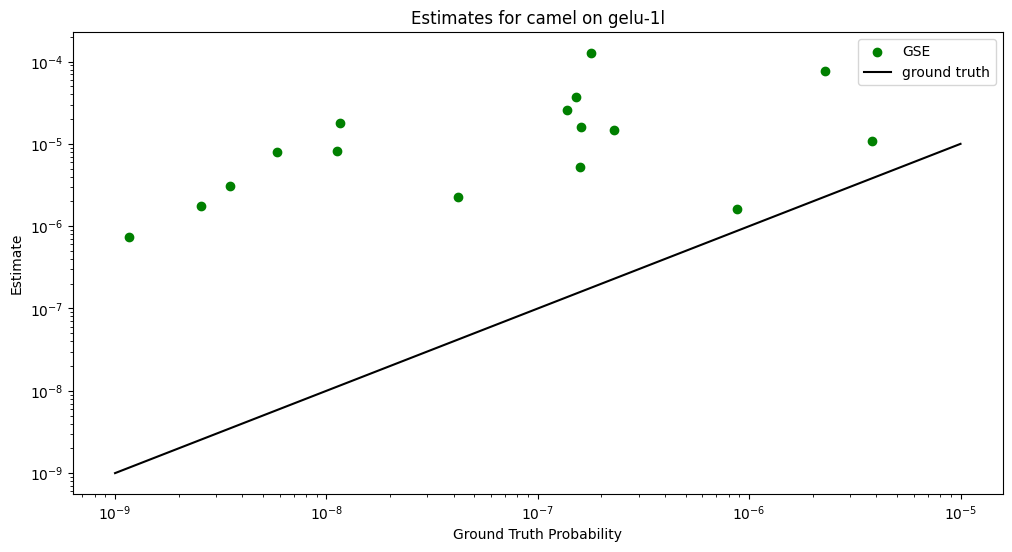

In [13]:
# Plot the (unfit) estimates
plt.figure(figsize=(12, 6))
colors = {'QLD': 'orange', 'ITGIS': 'red', 'MHIS': 'purple', 'GSE': 'green'}
methods = ["GSE"]#, "MHIS", "ITGIS"]
for method in methods:
    estimates_for_method = [estimates[method][target] for target in targets]
    plt.scatter(gt_probs[targets].cpu().numpy(), estimates_for_method, label=method, color=colors[method])

    # Plot the 0s at the bottom
    zero_targets = list(filter(lambda target: estimates[method][target] == 0, targets))
    plt.scatter(gt_probs[zero_targets].cpu().numpy(), [1e-9]*len(zero_targets), color=colors[method], marker='x')


plt.plot([1e-9, 1e-5], [1e-9, 1e-5], label='ground truth', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ground Truth Probability')
plt.ylabel('Estimate')
plt.title(f"Estimates for {dist_name} on {model_name}")
plt.legend()
plt.show()

In [14]:
import numpy as np

# Assuming 'estimates', 'gt_probs', and 'targets' are from the notebook
for method in methods:
    total_loss = 0
    num_targets = len(targets)
    for target in targets:
        p = gt_probs[target].item()
        q = estimates[method][target]

        # Avoid division by zero or log of zero for 0 estimates
        if q == 0:
            # Handle as a large loss, or skip
            # Depending on how you want to treat 0-estimates.
            # Here we will skip it and note it.
            print(f"Skipping target {target} for method {method} due to 0 estimate.")
            num_targets -=1
            continue

        loss = (p / q) - np.log(p / q) - 1
        total_loss += loss

    average_loss = total_loss / num_targets if num_targets > 0 else 0
    print(f"Average Itakura-Saito loss for {method}: {average_loss}")

Average Itakura-Saito loss for GSE: 4.042846080271166
